In [1]:
#Processing the data
from pandas import read_excel

In [2]:
df = read_excel ("/content/House_Prices.xlsx")

In [3]:
df

,SalePrice,GarageCars,GarageArea,OverallQual,GrLivArea
0,208500,2,548,7,1710
1,181500,2,460,6,1262
2,223500,1,608,7,1786
3,140000,1,642,7,1717
4,250000,2,836,8,2198
...,...,...,...,...,...
1455,175000,1,460,6,1647
1456,210000,2,500,6,2073
1457,266500,1,252,7,2340
1458,142125,0,240,5,1078


In [4]:
#Spliting the data in input and output
y = df["SalePrice"]

In [5]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [6]:
x = df[["GarageCars", "GarageArea","OverallQual","GrLivArea"]]

In [7]:
x

,GarageCars,GarageArea,OverallQual,GrLivArea
0,2,548,7,1710
1,2,460,6,1262
2,1,608,7,1786
3,1,642,7,1717
4,2,836,8,2198
...,...,...,...,...
1455,1,460,6,1647
1456,2,500,6,2073
1457,1,252,7,2340
1458,0,240,5,1078


In [8]:
1460*0.8

1168.0

In [9]:
#Spliting into training and testing
y_train = y[0:1168]

In [10]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1163    108959
1164    194000
1165    233170
1166    245350
1167    173000
Name: SalePrice, Length: 1168, dtype: int64

In [11]:
x_train = x[0:1168]

In [12]:
x_train

,GarageCars,GarageArea,OverallQual,GrLivArea
0,2,548,7,1710
1,2,460,6,1262
2,1,608,7,1786
3,1,642,7,1717
4,2,836,8,2198
...,...,...,...,...
1163,1,400,4,1258
1164,3,588,5,1432
1165,1,644,7,1502
1166,0,776,8,1694


In [13]:
y_test = y[1168:1460]

In [14]:
y_test

1168    235000
1169    625000
1170    171000
1171    163000
1172    171900
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 292, dtype: int64

In [15]:
x_test = x[1168:1460]

In [16]:
x_test

,GarageCars,GarageArea,OverallQual,GrLivArea
1168,3,540,6,2108
1169,1,807,10,3627
1170,2,358,6,1118
1171,0,433,6,1261
1172,1,625,7,1250
...,...,...,...,...
1455,1,460,6,1647
1456,2,500,6,2073
1457,1,252,7,2340
1458,0,240,5,1078


In [17]:
#Building Model
from keras.models import Sequential

In [18]:
from keras.layers import Dense, Activation

In [19]:
House_model = Sequential()

In [20]:
House_model.add(Dense(32, activation="relu", input_dim = 4))

In [21]:
House_model.add(Dense(32, activation = "relu"))

In [22]:
House_model.add(Dense(32, activation = "relu"))

In [23]:
House_model.add(Dense(1))

In [24]:
#Compiling the Model with loss and optimizer
House_model.compile(loss = "mean_squared_error", optimizer = "adam")

In [25]:
#Fitting the Model
hist = House_model.fit(x_train, y_train, epochs= 10000)

Streaming output truncated to the last 5000 lines.
37/37 [==============================] - 0s 3ms/step - loss: 1143944960.0000
Epoch 7502/10000
37/37 [==============================] - 0s 3ms/step - loss: 1158617728.0000
Epoch 7503/10000
37/37 [==============================] - 0s 3ms/step - loss: 1324183168.0000
Epoch 7504/10000
37/37 [==============================] - 0s 3ms/step - loss: 1177696896.0000
Epoch 7505/10000
37/37 [==============================] - 0s 3ms/step - loss: 1207668992.0000
Epoch 7506/10000
37/37 [==============================] - 0s 3ms/step - loss: 1332910208.0000
Epoch 7507/10000
37/37 [==============================] - 0s 4ms/step - loss: 1236796160.0000
Epoch 7508/10000
37/37 [==============================] - 0s 3ms/step - loss: 1214432384.0000
Epoch 7509/10000
37/37 [==============================] - 0s 3ms/step - loss: 1146747392.0000
Epoch 7510/10000
37/37 [==============================] - 0s 4ms/step - loss: 1156094336.0000
Epoch 7511/10000
37/37 [==

In [26]:
x_test

,GarageCars,GarageArea,OverallQual,GrLivArea
1168,3,540,6,2108
1169,1,807,10,3627
1170,2,358,6,1118
1171,0,433,6,1261
1172,1,625,7,1250
...,...,...,...,...
1455,1,460,6,1647
1456,2,500,6,2073
1457,1,252,7,2340
1458,0,240,5,1078


In [27]:
y_test

1168    235000
1169    625000
1170    171000
1171    163000
1172    171900
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 292, dtype: int64

In [28]:
#Evaluating the Model to Compute the Error
y_predicted = House_model.predict(x_test)

10/10 [==============================] - 0s 2ms/step


In [29]:
y_predicted.shape

(292, 1)

In [30]:
y_test.shape

(292,)

In [31]:
## reshaping 
y_predicted_1 = y_predicted.reshape(1,292)

In [32]:
import numpy 
y_test_1 = y_test.to_numpy()

In [33]:
APE = abs( numpy.subtract(y_predicted_1, y_test_1) )/y_test_1*100

In [34]:
MAPE = numpy.mean(APE)

In [35]:
MAPE

15.41993984818505

In [36]:
#Predicting the House sales Price Based on the Q2 of Inputs provided
House_model.predict([[2,600,7, 2200]])

1/1 [==============================] - 0s 37ms/step


array([[222338.39]], dtype=float32)

In [37]:
#Manual Simulating the Inputs Variables Impact on Predicted value

In [38]:
House_model.predict([[2, 548, 7, 1710]])

1/1 [==============================] - 0s 32ms/step


array([[200484.17]], dtype=float32)

In [39]:
House_model.predict([[0, 484, 7, 2090]])

1/1 [==============================] - 0s 40ms/step


array([[210435.66]], dtype=float32)

In [40]:
House_model.predict([[1, 294, 5, 1114]])

1/1 [==============================] - 0s 38ms/step


array([[127463.89]], dtype=float32)

In [41]:
House_model.predict([[3, 484, 8, 1234]])

1/1 [==============================] - 0s 41ms/step


array([[191861.81]], dtype=float32)

In [42]:
House_model.predict([[3, 600, 7, 2200]])

1/1 [==============================] - 0s 31ms/step


array([[222894.28]], dtype=float32)

In [43]:
min(x['GarageCars'])

0

In [44]:
min(x['GarageArea'])

0

In [45]:
min(x['OverallQual'])

1

In [46]:
min(x['GrLivArea'])

334

In [47]:
House_model.predict([[0, 0, 1, 334]])

1/1 [==============================] - 0s 51ms/step


array([[36646.54]], dtype=float32)

In [48]:
max(x['GarageCars'])

3

In [49]:
max(x['GarageArea'])

1418

In [50]:
max(x['OverallQual'])

10

In [51]:
max(x['GrLivArea'])

5642

In [52]:
House_model.predict([[3, 1418, 10, 5642]])

1/1 [==============================] - 0s 34ms/step


array([[665292.75]], dtype=float32)

In [53]:
House_model.predict([[2, 564, 7, 1604]])

1/1 [==============================] - 0s 44ms/step


array([[196899.5]], dtype=float32)

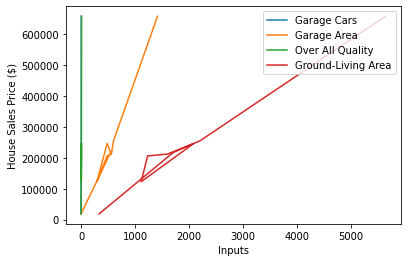

In [54]:
import matplotlib.pyplot as plt
a_X_Input = [[0, 0, 1, 334], [2, 548, 7, 1710], [0, 484, 7, 2090], [1, 294, 5, 1114], [3, 484, 8, 1234], [2, 564, 7, 1604],  [3, 600, 7, 2200], [3, 1418, 10, 5642]]
HSP_predicted = [[18550.143], [217722.67], [246725.17], [122850.11], [206385.2], [212439.78], [254709.16], [658764.44]]
#for a, b, c, d in a_X_Input:
plt.plot(a_X_Input, HSP_predicted)
plt.xlabel('Inputs')
plt.ylabel('House Sales Price ($)')
plt.legend(['Garage Cars', 'Garage Area', 'Over All Quality', 'Ground-Living Area'], loc='upper right')

In [55]:
#Automatic Simulation of Input Varaibls Impact on Predicted House Sales Prices
arr = x.values.tolist()
HSP_predicted = House_model.predict(arr)
GrageCars = [item[0] for item in arr]
a_GarageCars = numpy.array(GrageCars)
GrageArea = [item[1] for item in arr]
a_GarageArea = numpy.array(GrageArea)
OverAllQuality = [item[2] for item in arr]
a_OverAllQuality = numpy.array(OverAllQuality)
GroundLivingArea = [item[3] for item in arr]
a_GroundLivingArea = numpy.array(GroundLivingArea)


46/46 [==============================] - 0s 1ms/step


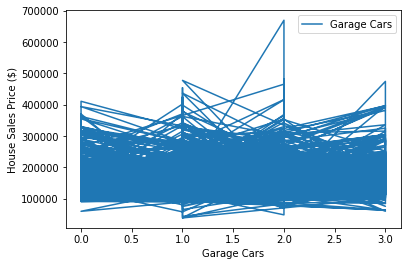

In [56]:
plt.plot(a_GarageCars, HSP_predicted)
plt.xlabel('Garage Cars')
plt.ylabel('House Sales Price ($)')
plt.legend(['Garage Cars'], loc='upper right')

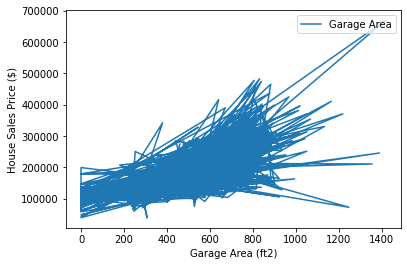

In [57]:

plt.plot(a_GarageArea, HSP_predicted)
plt.xlabel('Garage Area (ft2)')
plt.ylabel('House Sales Price ($)')
plt.legend(['Garage Area'], loc='upper right')

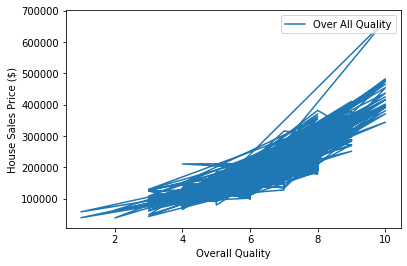

In [58]:
plt.plot(a_OverAllQuality, HSP_predicted)
plt.xlabel('Overall Quality')
plt.ylabel('House Sales Price ($)')
plt.legend(['Over All Quality'], loc='upper right')

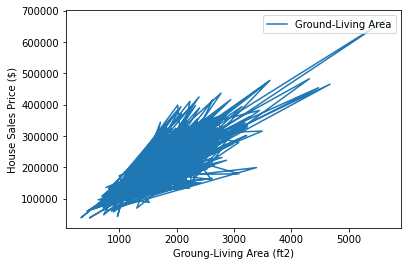

In [59]:
plt.plot(a_GroundLivingArea, HSP_predicted)
plt.xlabel('Groung-Living Area (ft2)')
plt.ylabel('House Sales Price ($)')
plt.legend(['Ground-Living Area'], loc='upper right')

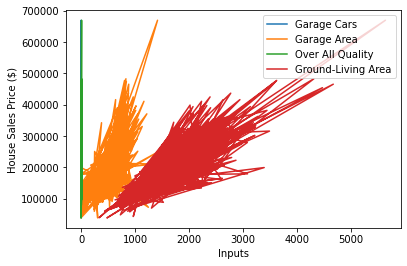

In [60]:
plt.plot(arr, HSP_predicted)
plt.xlabel('Inputs')
plt.ylabel('House Sales Price ($)')
plt.legend(['Garage Cars', 'Garage Area', 'Over All Quality', 'Ground-Living Area'], loc='upper right')

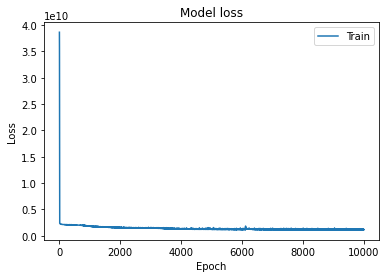

In [61]:
#Plotting the Loss Function
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

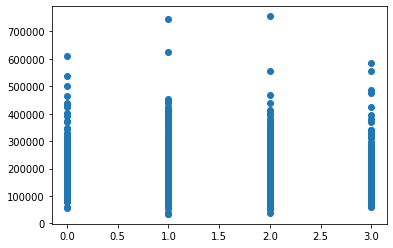

In [62]:
#Scatter Plots of all input vs output variables
plt.scatter(x["GarageCars"], y  )

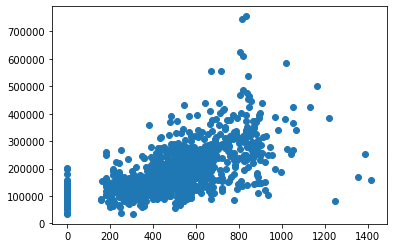

In [63]:
plt.scatter(x["GarageArea"], y  )

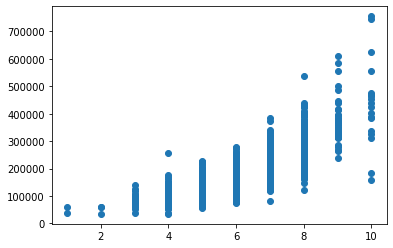

In [64]:
plt.scatter(x["OverallQual"], y  )

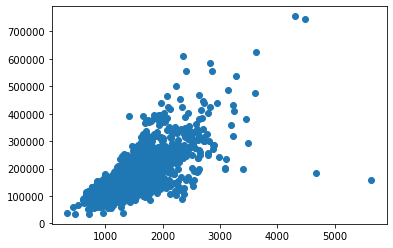

In [65]:
plt.scatter(x["GrLivArea"], y  )

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

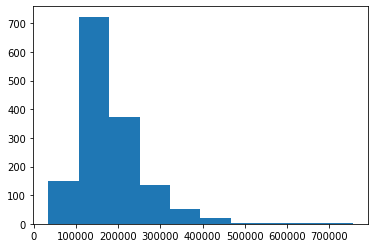

In [66]:
#Histogram of output and all inputs
plt.hist(y )

(array([ 89., 713., 430., 132.,  65.,  23.,   6.,   1.,   0.,   1.]),
 array([ 38542.72, 101589.14, 164635.56, 227681.98, 290728.4 , 353774.8 ,
        416821.25, 479867.7 , 542914.1 , 605960.5 , 669006.94],
       dtype=float32),
 <a list of 10 Patch objects>)

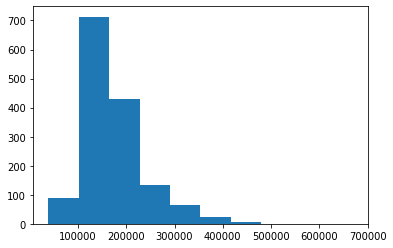

In [67]:
plt.hist(HSP_predicted)

(array([ 81., 167., 293., 500., 240., 106.,  57.,  10.,   3.,   3.]),
 array([   0. ,  141.8,  283.6,  425.4,  567.2,  709. ,  850.8,  992.6,
        1134.4, 1276.2, 1418. ]),
 <a list of 10 Patch objects>)

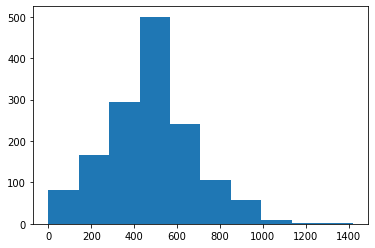

In [68]:
plt.hist(x["GarageArea"] )

(array([241.,   0.,   0., 502.,   0.,   0., 487.,   0.,   0., 230.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

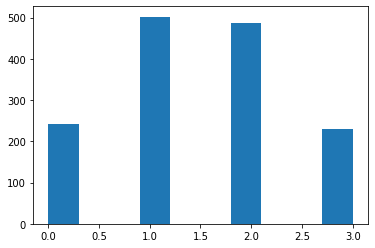

In [69]:
plt.hist(x["GarageCars"] )

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

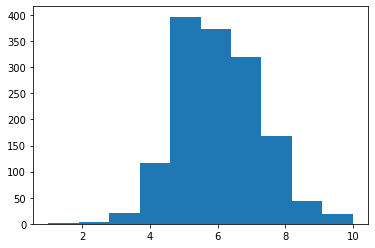

In [70]:
plt.hist(x["OverallQual"] )

(array([107., 554., 535., 189.,  57.,  12.,   2.,   2.,   1.,   1.]),
 array([ 334. ,  864.8, 1395.6, 1926.4, 2457.2, 2988. , 3518.8, 4049.6,
        4580.4, 5111.2, 5642. ]),
 <a list of 10 Patch objects>)

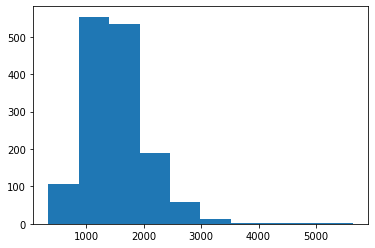

In [71]:
plt.hist(x["GrLivArea"] )

In [72]:
#Linear Regression with inputs and outputs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
y1 = df["SalePrice"]

In [74]:
#x = df[["GarageCars", "GarageArea","OverallQual","GrLivArea"]]

In [75]:
x1 = df["GarageArea"]

In [76]:
print(df.head())

   SalePrice  GarageCars  GarageArea  OverallQual  GrLivArea
0     208500           2         548            7       1710
1     181500           2         460            6       1262
2     223500           1         608            7       1786
3     140000           1         642            7       1717
4     250000           2         836            8       2198


In [77]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

In [78]:
N = len(x1)
x_mean = x1.mean()
y_mean = y1.mean()

In [79]:
B1_num = ((x1 - x_mean) * (y1 - y_mean)).sum()
B1_den = ((x1 - x_mean)**2).sum()
B1 = B1_num / B1_den

In [80]:
B0 = y_mean - (B1 * x_mean)

In [81]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [82]:
B0, B1, reg_line = linear_regression(x1, y1)
print('Regression Line: ', reg_line)
R = corr_coef(x1, y1)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 71357.42140747688 + 231.646β
Correlation Coef.:  nan
"Goodness of Fit":  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


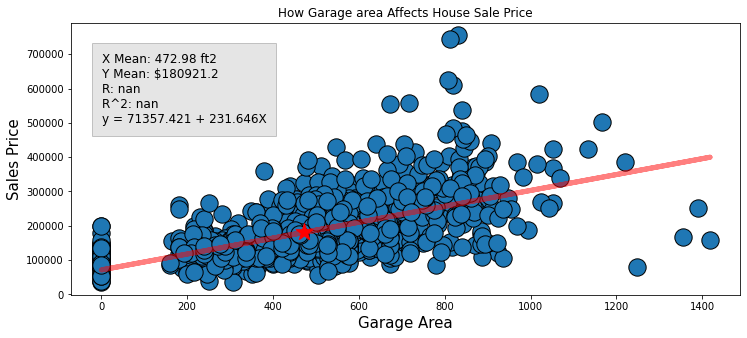

In [83]:
plt.figure(figsize=(12,5))
plt.scatter(x1, y1, s=300, linewidths=1, edgecolors ='black')
text = '''X Mean: {} ft2
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x1.mean(), 2), 
                       round(y1.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=1, y=500000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Garage area Affects House Sale Price')
plt.xlabel('Garage Area', fontsize=15)
plt.ylabel('Sales Price', fontsize=15)
plt.plot(x1, B0 + B1*x1, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x1.mean(), y=y1.mean(), marker='*', s=10**2.5, c='r') # average point

In [84]:
x2 = df["GarageCars"]

In [85]:
N = len(x2)
x2_mean = x2.mean()
y_mean = y1.mean()

In [86]:
B2_num = ((x2 - x2_mean) * (y1 - y_mean)).sum()
B2_den = ((x2 - x2_mean)**2).sum()
B2 = B2_num / B2_den

In [87]:
B0_1 = y_mean - (B2 * x2_mean)

In [88]:
B0_1, B2, reg_line = linear_regression(x2, y1)
print('Regression Line: ', reg_line)
R1 = corr_coef(x2, y1)
print('Correlation Coef.: ', R1)
print('"Goodness of Fit": ', R1**2)

Regression Line:  y = 182351.32276462484 + -963.982β
Correlation Coef.:  -0.8635989938972847
"Goodness of Fit":  0.7458032222604023


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


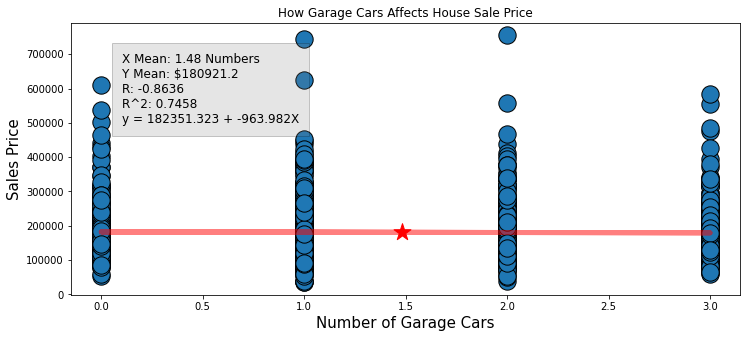

In [89]:
plt.figure(figsize=(12,5))
plt.scatter(x2, y1, s=300, linewidths=1, edgecolors ='black')
text = '''X Mean: {} Numbers
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x2.mean(), 2), 
                       round(y1.mean(), 2), 
                       round(R1, 4), 
                       round(R1**2, 4),
                       round(B0_1, 3),
                       round(B2, 3))
plt.text(x=0.1, y=500000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Garage Cars Affects House Sale Price')
plt.xlabel('Number of Garage Cars', fontsize=15)
plt.ylabel('Sales Price', fontsize=15)
plt.plot(x2, B0_1 + B2*x2, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x2.mean(), y=y1.mean(), marker='*', s=10**2.5, c='r') # average point

In [90]:
x3 = df["OverallQual"]

In [91]:
N = len(x3)
x3_mean = x3.mean()
y_mean = y1.mean()

In [92]:
B3_num = ((x3 - x3_mean) * (y1 - y_mean)).sum()
B3_den = ((x3 - x3_mean)**2).sum()
B3 = B3_num / B3_den

In [93]:
B0_2 = y_mean - (B3 * x3_mean)

In [94]:
B0_2, B3, reg_line = linear_regression(x3, y1)
print('Regression Line: ', reg_line)
R2 = corr_coef(x3, y1)
print('Correlation Coef.: ', R2)
print('"Goodness of Fit": ', R2**2)

Regression Line:  y = -96206.07951476038 + 45435.803β
Correlation Coef.:  88.87219688490761
"Goodness of Fit":  7898.267379149782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


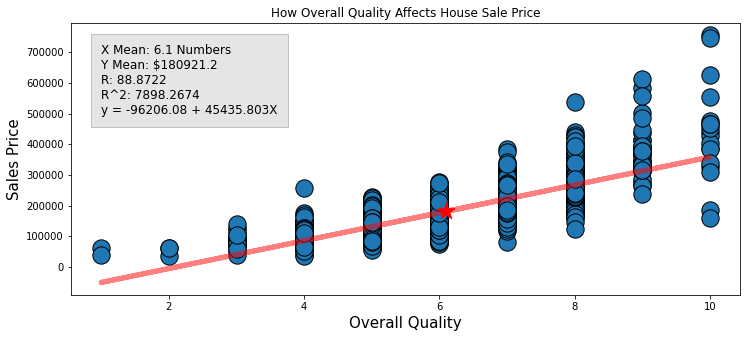

In [95]:
plt.figure(figsize=(12,5))
plt.scatter(x3, y1, s=300, linewidths=1, edgecolors ='black')
text = '''X Mean: {} Numbers
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x3.mean(), 2), 
                       round(y1.mean(), 2), 
                       round(R2, 4), 
                       round(R2**2, 4),
                       round(B0_2, 3),
                       round(B3, 3))
plt.text(x= 1, y=500000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Overall Quality Affects House Sale Price')
plt.xlabel('Overall Quality', fontsize=15)
plt.ylabel('Sales Price', fontsize=15)
plt.plot(x3, B0_2 + B3*x3, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x3.mean(), y=y1.mean(), marker='*', s=10**2.5, c='r') # average point

In [96]:
x4 = df["GrLivArea"]

In [97]:
N = len(x4)
x4_mean = x4.mean()
y_mean = y1.mean()

In [98]:
B4_num = ((x4 - x4_mean) * (y1 - y_mean)).sum()
B4_den = ((x4 - x4_mean)**2).sum()
B4 = B4_num / B4_den

In [99]:
B0_3 = y_mean - (B4 * x4_mean)

In [100]:
B0_3, B4, reg_line = linear_regression(x4, y1)
print('Regression Line: ', reg_line)
R3 = corr_coef(x4, y1)
print('Correlation Coef.: ', R3)
print('"Goodness of Fit": ', R3**2)

Regression Line:  y = 18569.02585648728 + 107.13β
Correlation Coef.:  26150.649968500285
"Goodness of Fit":  683856493.7750239


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


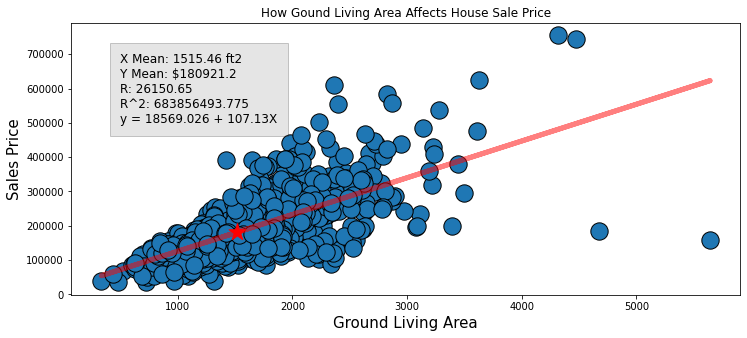

In [101]:
plt.figure(figsize=(12,5))
plt.scatter(x4, y1, s=300, linewidths=1, edgecolors ='black')
text = '''X Mean: {} ft2
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x4.mean(), 2), 
                       round(y1.mean(), 2), 
                       round(R3, 4), 
                       round(R3**2, 4),
                       round(B0_3, 3),
                       round(B4, 3))
plt.text(x= 500, y=500000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Gound Living Area Affects House Sale Price')
plt.xlabel('Ground Living Area', fontsize=15)
plt.ylabel('Sales Price', fontsize=15)
plt.plot(x4, B0_3 + B4*x4, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x4.mean(), y=y1.mean(), marker='*', s=10**2.5, c='r') # average point